In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=17,8

In [2]:
red=pd.read_csv("winequality-red.csv", sep=';')
red['type']=0
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [3]:
white=pd.read_csv("winequality-white.csv", sep=';')
white['type']=1
print(white.shape)
white.head()

(4898, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [4]:
wine = pd.concat([red,white], axis=0, ignore_index=True)
print(wine.shape)
wine.tail()

(6497, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,1


In [5]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [6]:
sorted(wine.quality.unique())

[3, 4, 5, 6, 7, 8, 9]

In [7]:
wine.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [8]:
wine[wine.quality == 9]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
2373,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9,1
2419,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9,1
2426,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9,1
2475,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9,1
3204,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9,1


### 탐색적분석(EDA)

In [9]:
wine.columns = wine.columns.str.replace(' ','_')

In [10]:
wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

- 그룹별 분석? 와인 종류에 따라서 품질이 얼마나 다를까?

In [11]:
wine.groupby('type').quality.describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
0,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
1,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [12]:
red_quality=wine.loc[wine.type==0, 'quality']
white_quality=wine.loc[wine.type==1, 'quality']

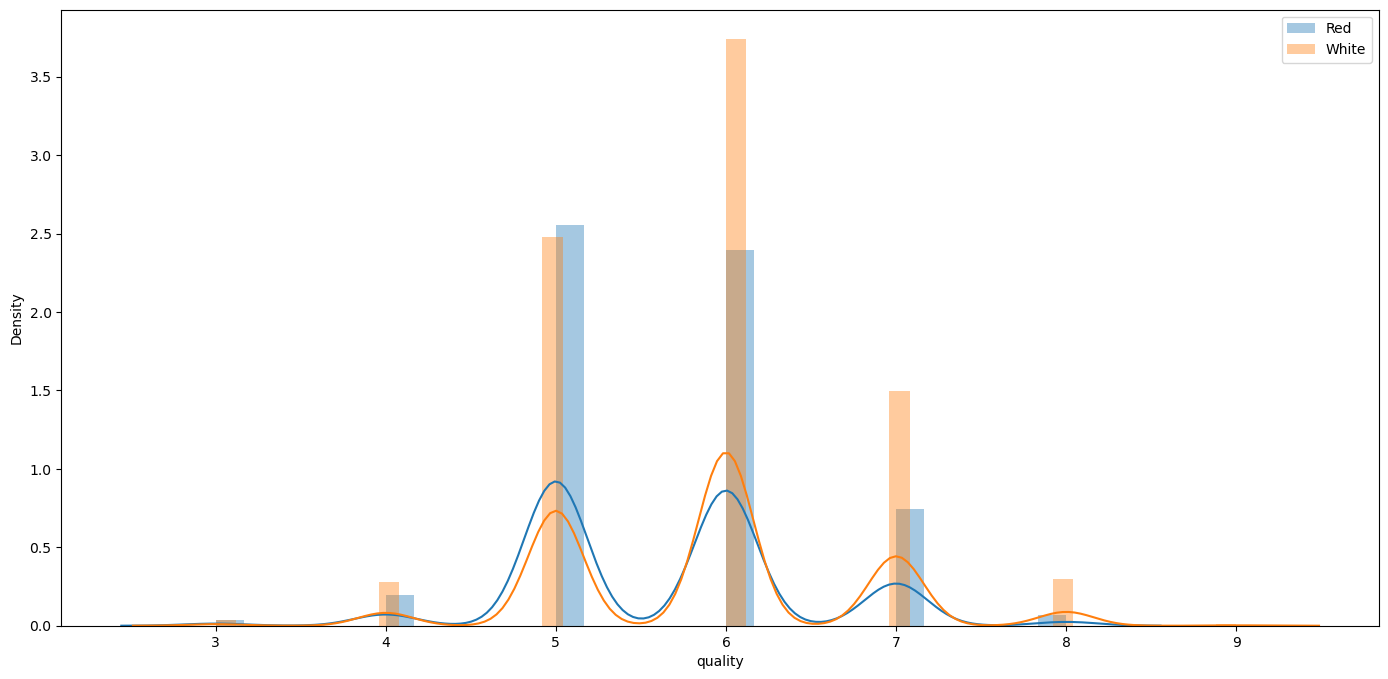

In [13]:
sns.distplot(red_quality, label='Red')
sns.distplot(white_quality, label='White')
plt.legend()

## T-test
- 와인종류에 따른 품질의 차이가 통계적으로 유의한 수준인지 알기위해
- p-value < 0.05: 95% 이상의 신뢰수준으로 두 그룹간 품질의 차이가 통계적으로 유의하다.
- p-value: 0.0000000 -> 99.9999999% 신뢰수준으로!

In [14]:
import statsmodels.api as sm

In [15]:
t, pvalue, df = sm.stats.ttest_ind(red_quality, white_quality)

In [16]:
"T값은 %.3f이고 pvalue는 %.10f입니다"%(t, pvalue)

'T값은 -9.686이고 pvalue는 0.0000000000입니다'

## 상관관계분석

In [17]:
wine.corrwith(wine.quality).sort_values()

density                -0.305858
volatile_acidity       -0.265699
chlorides              -0.200666
fixed_acidity          -0.076743
total_sulfur_dioxide   -0.041385
residual_sugar         -0.036980
pH                      0.019506
sulphates               0.038485
free_sulfur_dioxide     0.055463
citric_acid             0.085532
type                    0.119323
alcohol                 0.444319
quality                 1.000000
dtype: float64

<AxesSubplot:>

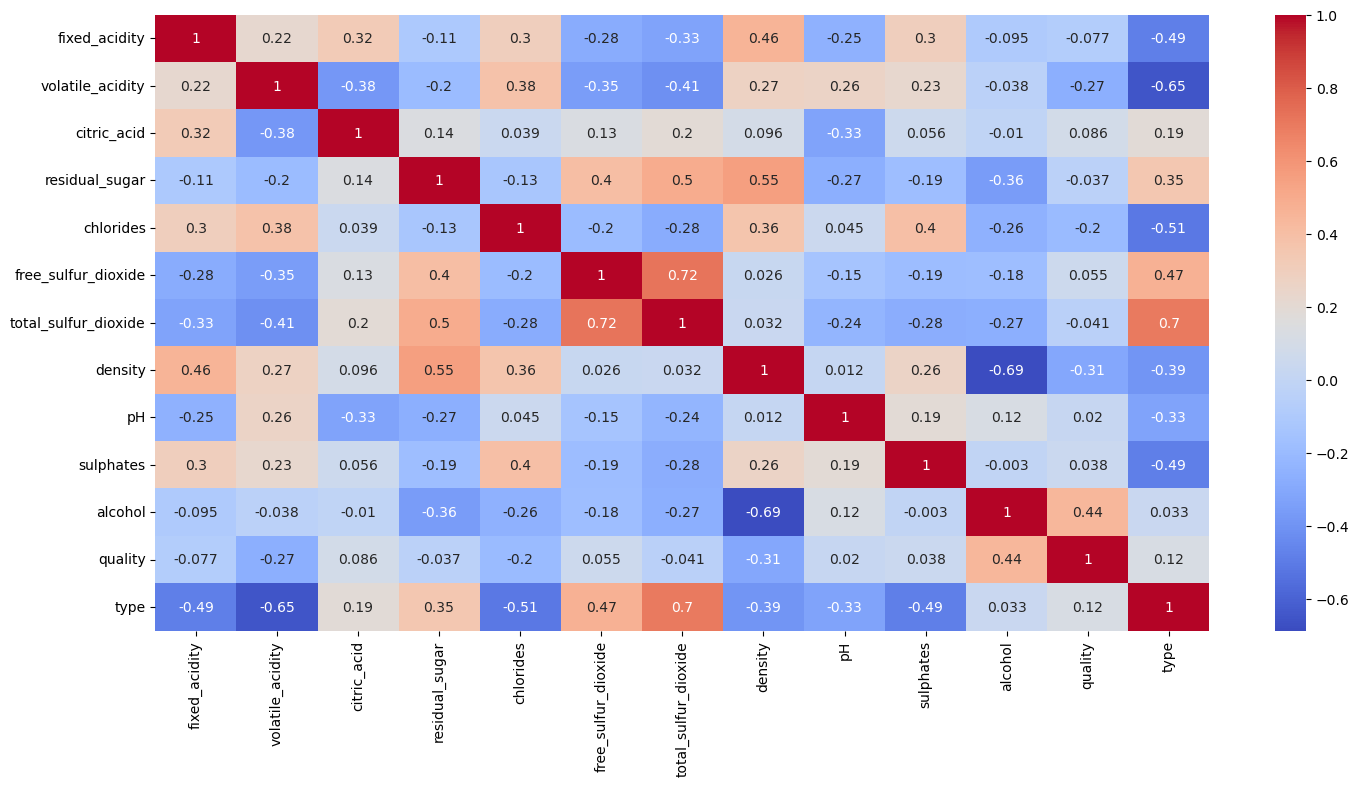

In [18]:
sns.heatmap(wine.corr(), annot=True, cmap='coolwarm')
#색깔이 빨갛거나 파란거 위주로 집중

In [19]:
wine.index

RangeIndex(start=0, stop=6497, step=1)

In [20]:
def sampling(data, n=300):
    return data.loc[np.random.choice(data.index, replace=False, size=n)]

In [21]:
red = wine[wine.type==0]
white = wine[wine.type==1]

In [22]:
red_sample = sampling(red)
white_sample = sampling(white)

In [23]:
print(red_sample.shape)
red_sample.head()

(300, 13)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
1089,11.6,0.410,0.54,1.5,0.095,22.0,41.0,0.99735,3.02,0.76,9.9,7,0
273,8.4,0.715,0.20,2.4,0.076,10.0,38.0,0.99735,3.31,0.64,9.4,5,0
1016,8.9,0.380,0.40,2.2,0.068,12.0,28.0,0.99486,3.27,0.75,12.6,7,0
824,7.1,0.480,0.28,2.8,0.068,6.0,16.0,0.99682,3.24,0.53,10.3,5,0
1267,10.4,0.430,0.50,2.3,0.068,13.0,19.0,0.99600,3.10,0.87,11.4,6,0


In [24]:
wine_sample = pd.concat([red_sample, white_sample], axis=0)
print(wine_sample.shape)
wine_sample.head()

(600, 13)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
1089,11.6,0.410,0.54,1.5,0.095,22.0,41.0,0.99735,3.02,0.76,9.9,7,0
273,8.4,0.715,0.20,2.4,0.076,10.0,38.0,0.99735,3.31,0.64,9.4,5,0
1016,8.9,0.380,0.40,2.2,0.068,12.0,28.0,0.99486,3.27,0.75,12.6,7,0
824,7.1,0.480,0.28,2.8,0.068,6.0,16.0,0.99682,3.24,0.53,10.3,5,0
1267,10.4,0.430,0.50,2.3,0.068,13.0,19.0,0.99600,3.10,0.87,11.4,6,0


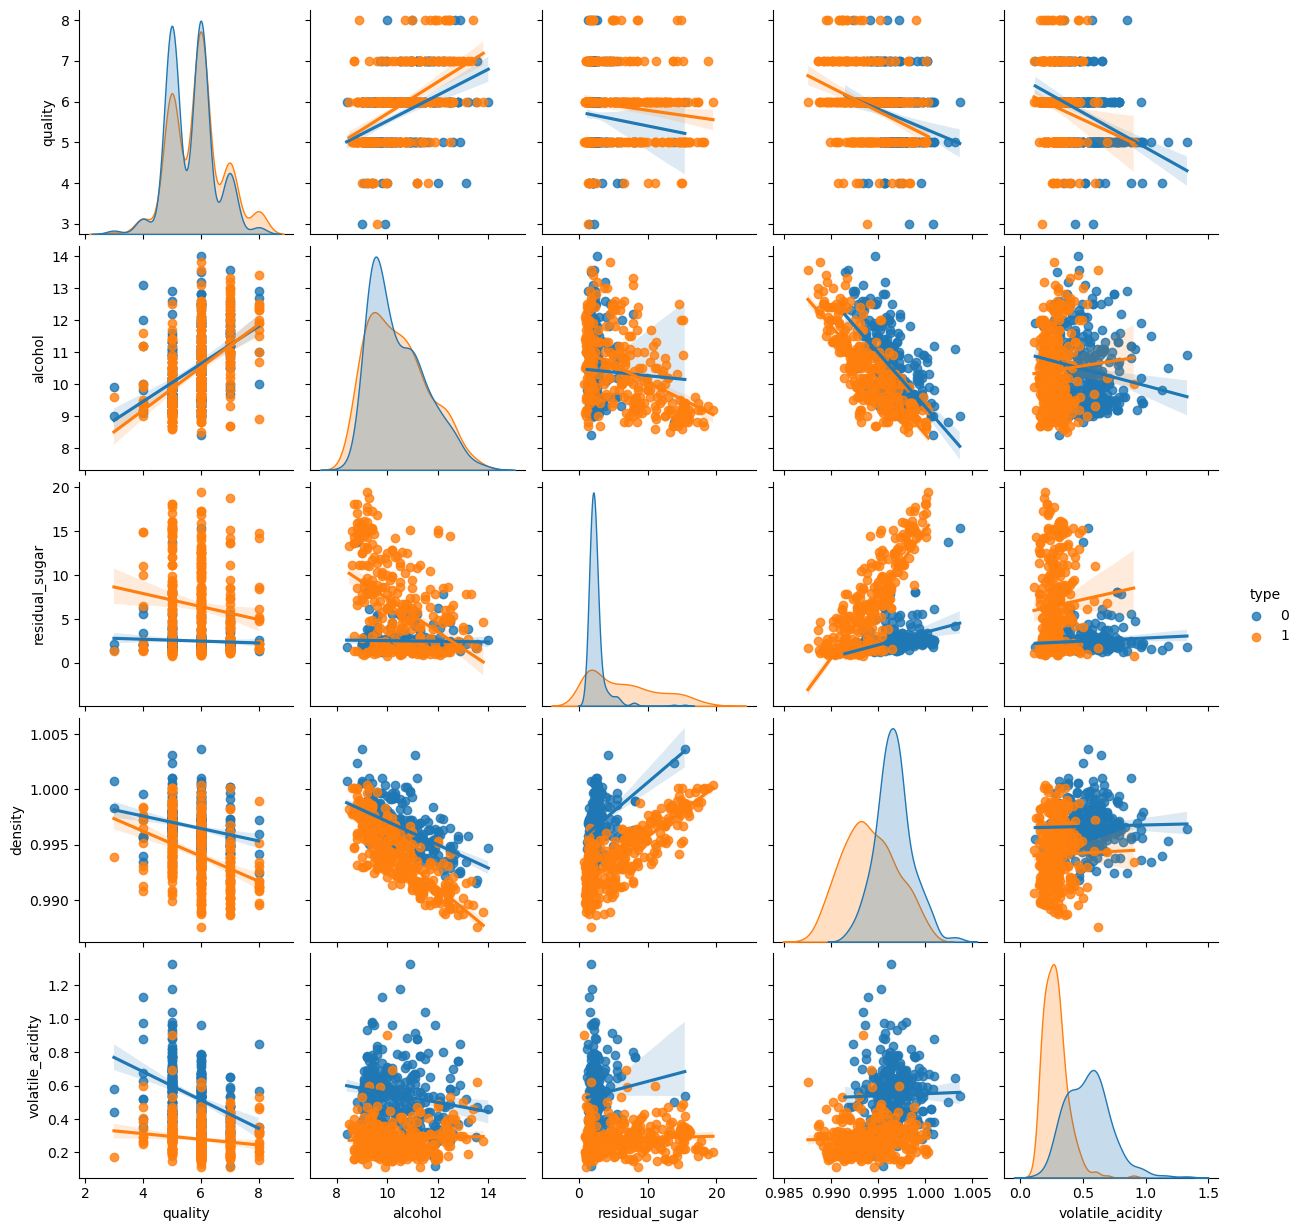

In [25]:
sns.pairplot(wine_sample, kind='reg', hue='type',
                 vars=["quality",'alcohol','residual_sugar','density','volatile_acidity'])

### 선형회귀분석
- y = wX1 + wX2 + wX3 + b
- 와인품질 = w1알코올 + w2밀도 + w3잔여설탕 + ... + b

In [26]:
my_formula = 'quality ~ alcohol + density + residual_sugar + volatile_acidity'

In [27]:
from statsmodels.formula.api import ols

- 최소제곱법 : 잔차(관측값-예측값)의 제곱의 합을 최소하하는 회귀선을 찾아서 회귀계수를 정함

In [28]:
model = ols(my_formula, data=wine).fit()

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     595.4
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        13:52:58   Log-Likelihood:                -7322.7
No. Observations:                6497   AIC:                         1.466e+04
Df Residuals:                    6492   BIC:                         1.469e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -25.4390      5.547     -4.586      0.000     -36.312     -14.566
alcohol              0.3777      0.011     34.171      0.000       0.356       0.399
density             27.8734      5.519      5.050      0.000      17.054      38.693
residual_sugar       0.0081      0.003      3.077      0.002       0.003       0.013
volatile_acidity    -1.3984      0.067    -20.875      0.000      -1.530      -1.267
==============================================================================
Omnibus:                      114.141   Durbin-Watson:                   1.652
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.028
Skew:                          -0.006   Prob(JB):                     4.13e-51
Kurtosis:                       3.926   Cond. No.                     1.02e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 독립변수를 표준화
- 변수의 관측값의 평균을 빼고, 그 결과를 표준편차로 나누자!!
- 표준화된 변수의 값은 평균은 0이되고 표준편차는 1이 됩니다

In [30]:
y = wine.quality
x = wine[wine.columns.difference(['quality','type'])]
x_standard=(x-x.mean()) / x.std()
wine_standard = pd.concat([x_standard,y,wine.type], axis=1)
model_standard = ols(my_formula, wine_standard).fit()
model_standard.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     595.4
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        13:52:58   Log-Likelihood:                -7322.7
No. Observations:                6497   AIC:                         1.466e+04
Df Residuals:                    6492   BIC:                         1.469e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.8184      0.009    627.682      0.000       5.800       5.837
alcohol              0.4505      0.013     34.171      0.000       0.425       0.476
density              0.0836      0.017      5.050      0.000       0.051       0.116
residual_sugar       0.0383      0.012      3.077      0.002       0.014       0.063
volatile_acidity    -0.2302      0.011    -20.875      0.000      -0.252      -0.209
==============================================================================
Omnibus:                      114.141   Durbin-Watson:                   1.652
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.028
Skew:                          -0.006   Prob(JB):                     4.13e-51
Kurtosis:                       3.926   Cond. No.                         3.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 머신러닝 

In [31]:
feature = ['alcohol','density','type','residual_sugar','volatile_acidity']

In [32]:
X = wine_standard[feature]
y = wine.quality

### 훈련데이터와 테스트데이터

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

In [35]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5197, 5)
(5197,)
(1300, 5)
(1300,)


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [37]:
#model = LinearRegression()

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
# model=DecisionTreeRegressor(max_depth=6,
#                             min_samples_split=2)

In [40]:
max_depth=[30, 35, 40, 45, 50]
max_feature=[0.2, 0.3, 0.4, 0.5, 0.6]

In [41]:
hyper = []
for a in max_depth:
    for b in max_feature:
        model = RandomForestRegressor(n_estimators = 500,
                                     max_depth = a,
                                     max_features = b,
                                     random_state = 31,
                                     n_jobs=-1)
        model.fit(X_train, y_train)
        prediction = model.predict(X_test)
        score = metrics.mean_squared_error(y_test, prediction)
        
        hyper.append({'점수':score,
                     'max_depth':a,
                     'max_feature':b})
        
        print("현재 점수는 %.5f입니다!!"%score)

NameError: name 'metrics' is not defined

In [ ]:
pd.DataFrame(hyper).sort_values(by='점수')

In [ ]:
model = RandomForestRegressor(n_estimators = 5000,
                             max_depth = 7,
                             max_features = 0.8,
                             random_state = 31,
                             n_jobs=-1)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
prediction = model.predict(X_test)

In [ ]:
#list(zip(feature, model.coef_))

In [ ]:
#model.intercept_

In [ ]:
list(zip(feature, model.feature_importances_))

In [ ]:
from sklearn import metrics

In [ ]:
metrics.mean_squared_error(prediction,y_test)